In [1]:
import sys
sys.path.append('src')
from pathlib import Path
import pandas as pd
import tarfile
import urllib

def load_metadata():
  file_path = Path("data/train.csv")
  return pd.read_csv(file_path)
  
metadata = load_metadata()

def extract_eeg():
  eeg_dir = Path("../data/eeg")
  tarball_path = Path("data/eeg.tar.gz")
  if not tarball_path.is_file():
    url = 'https://dl.dropboxusercontent.com/scl/fi/5sina48c4naaxv6uze0fv/eeg.tar.gz?rlkey=r7ec191extynfcm8fy0tsiws5&dl=0'
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as eeg_tarball:
      eeg_tarball.extractall()
    
extract_eeg()

metadata


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,4144388963,140,604.0,1156825996,140,604.0,1451266906,59489,GRDA,0,0,0,0,3,0
1,2353475448,30,64.0,1002394133,30,64.0,4000072340,5339,LRDA,0,0,0,3,0,0
2,1618328341,9,52.0,900482955,9,52.0,4140697659,20198,GRDA,0,0,0,0,3,0
3,979865826,7,90.0,1626043434,7,90.0,919550440,1069,Other,1,1,4,1,4,5
4,521108392,0,0.0,827447277,0,0.0,1717414556,13134,Other,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2509824693,10,68.0,1005228554,15,330.0,219919562,14386,LPD,0,11,0,1,1,2
996,2882719839,14,50.0,2035369578,14,50.0,4193559045,2641,GPD,5,0,11,0,0,0
997,1322226281,2,18.0,1740512896,2,18.0,1697286566,49448,Other,0,0,0,0,0,3
998,628369060,15,98.0,13143748,17,292.0,1650460145,34998,GPD,0,3,7,0,2,4


In [2]:
# Visualization
import dask.dataframe as dd
import numpy as np
import glob

channel_order = ['Fp1', 'Fp2',
            'F7', 'F3', 'Fz', 'F4', 'F8', 
            'T3', 'C3', 'Cz', 'C4', 'T4', 
            'T5', 'P3', 'Pz', 'P4', 'T6', 
            'O1', 'O2',
            ]
sfreq = 200
eeg_ids = metadata['eeg_id'].to_list()

ddf_list = []
for eeg_id in eeg_ids:
  f_name = f'data/eeg/{eeg_id}.parquet'
  temp_ddf = dd.read_parquet(f_name).drop('EKG', axis=1) [channel_order]
  temp_ddf['eeg_id'] = str(eeg_id)
  temp_ddf = temp_ddf.set_index('eeg_id')
  ddf_list.append(temp_ddf)

ddf = dd.concat(ddf_list)
ddf



,Fp1,Fp2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2
npartitions=1000,,,,,,,,,,,,,,,,,,,
,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [3]:
df = ddf.compute()
df



,Fp1,Fp2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2
eeg_id,,,,,,,,,,,,,,,,,,,
4144388963,4.340000,-30.620001,33.320000,14.510000,-27.790001,21.660000,-37.009998,11.040000,-7.910000,-19.620001,-7.380000,9.900000,5.670000,-9.180000,-0.63,9.350000,9.260000,-13.74,-7.970000
4144388963,1.900000,-28.379999,24.629999,2.340000,-28.870001,18.320000,-29.200001,21.520000,-12.530000,-18.240000,-3.400000,9.310000,7.950000,-7.210000,2.29,14.290000,12.010000,-11.14,-3.830000
4144388963,18.959999,-14.940000,51.020000,-7.860000,-28.110001,9.710000,-16.610001,37.540001,-17.780001,-19.290001,-14.670000,14.190000,9.460000,-8.130000,-0.56,8.720000,9.810000,-8.72,-6.950000
4144388963,23.230000,-13.990000,45.340000,11.850000,-25.930000,0.320000,1.800000,36.529999,-7.400000,-19.320000,-26.650000,2.440000,7.960000,-6.550000,-0.41,4.450000,5.170000,-6.82,-5.790000
4144388963,3.680000,-24.469999,23.020000,12.820000,-26.860001,21.740000,-0.360000,-8.000000,-4.640000,-18.670000,-16.360001,53.560001,6.290000,-7.360000,0.08,8.530000,10.930000,-10.94,-5.860000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735834491,-39.990002,-11.380000,14.590000,-20.500000,-15.240000,-23.340000,-57.529999,-12.530000,7.420000,-20.930000,-16.010000,1.680000,-3.070000,-1.150000,2.43,-0.170000,-23.500000,-6.85,3.350000
735834491,-74.470001,-50.410000,-10.230000,-46.110001,-35.630001,-53.380001,-85.099998,-32.070000,-14.630000,-38.250000,-40.669998,-25.490000,-22.780001,-22.990000,-15.43,-26.559999,-49.869999,-26.16,-22.389999
735834491,-66.209999,-31.180000,-4.690000,-39.560001,-26.389999,-49.680000,-75.089996,-27.030001,-7.510000,-28.959999,-32.930000,-10.000000,-10.790000,-11.880000,-5.56,-20.100000,-42.110001,-11.15,-14.310000


In [4]:
print(np.var(df['Fp1'], axis=0)) #variance for one col/channel
fpl = df['Pz'].fillna(0).to_numpy() #converting to numby array for easier computation
print(np.var(fpl, axis=0))

718546.75
337383.94


In [5]:
# one sample and their channels
sig1 = df.loc[['1618328341']]
sig1

,Fp1,Fp2,F7,F3,Fz,F4,F8,T3,C3,Cz,C4,T4,T5,P3,Pz,P4,T6,O1,O2
eeg_id,,,,,,,,,,,,,,,,,,,
1618328341,34.400002,86.589996,-40.759998,-19.090000,-2.850000,30.740000,27.959999,-37.130001,-46.180000,-16.33,-2.29,18.639999,-52.200001,-48.480000,-21.540001,-33.259998,-33.840000,-47.520000,-50.599998
1618328341,35.689999,92.430000,-29.830000,-11.670000,5.910000,38.959999,31.400000,-29.719999,-39.029999,-7.53,8.05,29.690001,-39.060001,-43.009998,-14.730000,-13.180000,-4.350000,-43.599998,-37.070000
1618328341,31.950001,91.120003,-25.870001,-11.580000,3.510000,41.389999,29.580000,-22.469999,-36.720001,-1.94,16.57,19.430000,-28.420000,-35.759998,-3.830000,2.600000,6.930000,-32.689999,-21.850000
1618328341,26.730000,71.000000,-26.219999,-17.850000,-11.600000,26.040001,3.490000,-17.559999,-39.130001,-6.43,9.83,-1.340000,-26.280001,-29.180000,9.220000,8.160000,17.080000,-18.879999,-10.840000
1618328341,24.799999,65.709999,-26.160000,-16.400000,-7.720000,24.540001,-6.660000,-21.770000,-37.270000,-1.79,11.62,-0.550000,-22.400000,-21.969999,15.090000,17.719999,16.299999,-8.130000,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618328341,-123.110001,-79.769997,-57.580002,-49.369999,-37.799999,0.600000,32.070000,25.440001,-6.710000,-0.58,20.99,61.919998,41.880001,14.470000,14.070000,22.209999,35.299999,33.040001,7.410000
1618328341,-136.369995,-99.459999,-59.759998,-57.430000,-50.759998,-7.860000,22.990000,39.930000,-5.810000,-6.99,13.51,53.189999,49.139999,21.200001,20.990000,21.350000,38.080002,40.400002,11.210000
1618328341,-136.460007,-99.830002,-49.590000,-50.619999,-43.549999,-6.320000,21.549999,43.349998,3.680000,-2.75,17.32,46.320000,62.189999,28.340000,24.750000,26.459999,51.869999,43.480000,13.330000


In [6]:
sig1['Fp1']


eeg_id
1618328341     34.400002
1618328341     35.689999
1618328341     31.950001
1618328341     26.730000
1618328341     24.799999
                 ...    
1618328341   -123.110001
1618328341   -136.369995
1618328341   -136.460007
1618328341   -139.380005
1618328341   -151.929993
Name: Fp1, Length: 22800, dtype: float32

In [7]:
# variance for one channel(Fp1) in one signal(4144388963)
np.var(sig1['Fp1'].to_numpy())


4566.286

In [8]:
from feature_extraction.channel_selection import calculate_top_channels

top_channels = calculate_top_channels(sig1)
print("Top 3 channels with highest variance for the single sample:")
for i, channel in enumerate(top_channels, start=1):
    print(f"{i}. {channel}")

All channels: [('Fp2', 6680.8887), ('Fp1', 4566.286), ('F7', 2778.6633), ('T3', 2048.039), ('F8', 1655.0438), ('T5', 1345.5327), ('O1', 1132.6462), ('T6', 1045.611), ('T4', 1009.99817), ('O2', 1004.8821), ('P3', 904.27844), ('P4', 758.57056), ('Pz', 616.15546), ('C3', 592.70886), ('F4', 521.0158), ('F3', 478.9111), ('C4', 429.0064), ('Fz', 402.60165), ('Cz', 130.08998)]
Top 3 channels with highest variance for the single sample:
1. Fp2
2. Fp1
3. F7


In [9]:
# Feature extraction
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew, entropy

top_channels_list = ['Fp2', 'Fp1', 'F7']

# A dictionary to store 11 features' values for each channel
channel_features_sig1 = {}

# Store calculated features for each channel in the dictionary
for channel in top_channels_list:
    channel_data = sig1[channel].values

    # Compute probability distribution for entropy
    hist, bin_edges = np.histogram(channel_data, bins='auto', density=True)

    # Caculate
    std_value = np.nanstd(channel_data)
    mean_value = np.nanmean(channel_data)
    var_value = np.nanvar(channel_data)
    med_value = np.nanmedian(channel_data)
    krt_value = kurtosis(channel_data, fisher=True, bias=False)
    skw_value = skew(channel_data, bias=False)
    ent_value = entropy(hist, base=2)
    max_value = np.nanmax(channel_data)
    min_value = np.nanmin(channel_data)

    # Store
    channel_features_sig1[channel] = {
        'std': std_value,
        'mean' : mean_value,
        'variance' : var_value,
        'median' : med_value,
        'kurtosis': krt_value,
        'skewness' : skw_value,
        'entropy' : ent_value,
        'max_eeg' : max_value,
        'min_eeg' : min_value
    }

# Display stored feature values for each channel
for channel, features in channel_features_sig1.items():
    print(f"Features for channel {channel}: ")
    for feature, value in features.items():
        print(f"{feature}: {value}")


Features for channel Fp2: 
std: 81.73670196533203
mean: -4.259478569030762
variance: 6680.88818359375
median: -6.320000171661377
kurtosis: 2.2165842056274414
skewness: -0.1727318912744522
entropy: 5.856117959083385
max_eeg: 277.1199951171875
min_eeg: -472.5899963378906
Features for channel Fp1: 
std: 67.57430267333984
mean: -13.535626411437988
variance: 4566.2861328125
median: -12.739999771118164
kurtosis: 5.104116439819336
skewness: -1.2790873050689697
entropy: 5.825498184713496
max_eeg: 152.2899932861328
min_eeg: -409.8800048828125
Features for channel F7: 
std: 52.71302795410156
mean: -20.5283203125
variance: 2778.663330078125
median: -17.010000228881836
kurtosis: 2.5254106521606445
skewness: -0.39405137300491333
entropy: 5.700823338496503
max_eeg: 234.50999450683594
min_eeg: -247.69000244140625


Creating RawArray with float64 data, n_channels=19, n_times=22800
    Range : 0 ... 22799 =      0.000 ...   113.995 secs
Ready.
Using matplotlib as 2D backend.


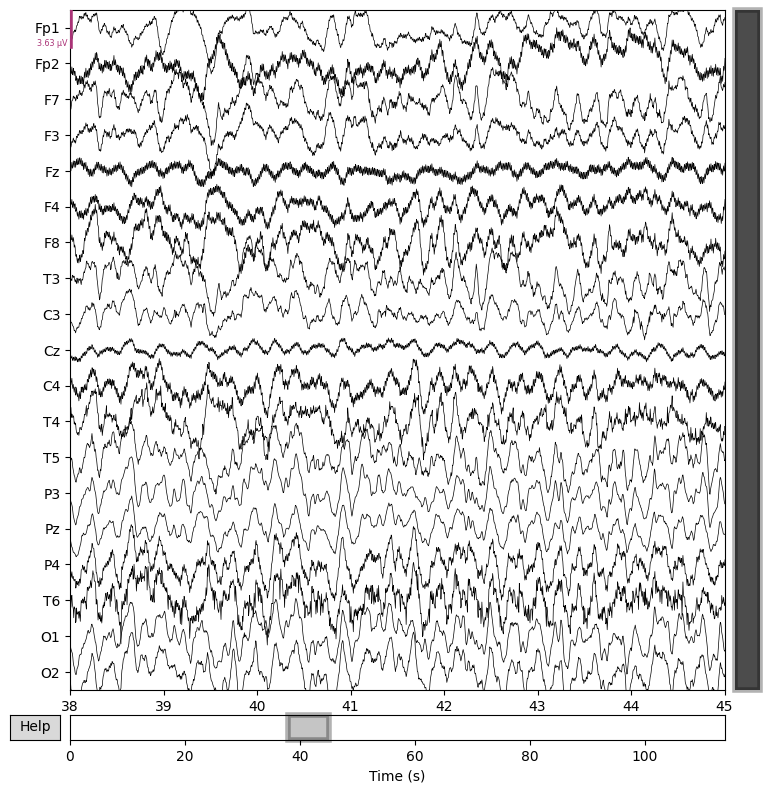

Applying baseline correction (mode: mean)


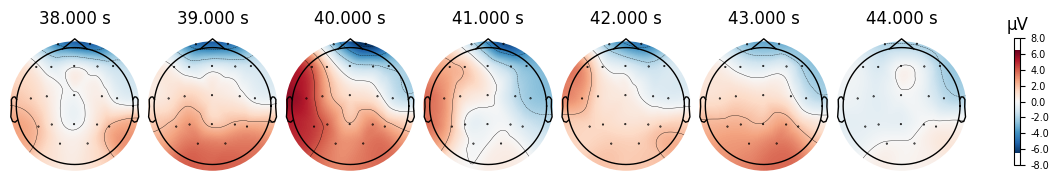

In [10]:
# Visualization
from visualize import VisualizeEEG
raw_df = ddf.partitions[2].compute()

vis_eeg = VisualizeEEG(raw_df)
# Plot signal channels
vis_eeg.plot_signal(start=38, duration=7)
# Plot topographic map
vis_eeg.plot_topomap(start=38, end=45, delta=1)

